<a href="https://colab.research.google.com/github/ayuncantikbgt/Deteksi_Penyakit_Tanaman/blob/main/Deteksi_Tanaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

deteksi daun

In [16]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ekstrak file ZIP
import zipfile
zip_path = '/content/drive/MyDrive/Colab Notebooks/archive.zip'  # Ganti dengan path file ZIP Anda
extract_dir = '/content/plant_disease_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


uji coba metode CNN

Found 33022 images belonging to 2 classes.
Found 8254 images belonging to 2 classes.
Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 926ms/step - accuracy: 0.5395 - loss: 1.6946 - val_accuracy: 0.5063 - val_loss: 0.6964
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 974ms/step - accuracy: 0.5143 - loss: 0.6947 - val_accuracy: 0.4750 - val_loss: 0.6939
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 935ms/step - accuracy: 0.5107 - loss: 0.6943 - val_accuracy: 0.4875 - val_loss: 0.6938
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 938ms/step - accuracy: 0.4818 - loss: 0.6939 - val_accuracy: 0.4375 - val_loss: 0.6940
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 986ms/step - accuracy: 0.5351 - loss: 0.6929 - val_accuracy: 0.5188 - val_loss: 0.6928


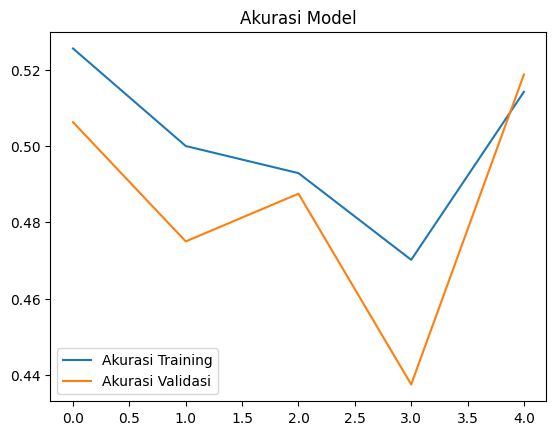

In [18]:
# Langkah 1: Import library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Langkah 2: Load dan preprocess data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

data_dir = '/content/plant_disease_dataset'  # folder sudah diekstrak

# Batasi data agar ringan, gunakan batch_size kecil dan steps kecil
batch_size = 32
steps_per_epoch = 720 // batch_size     # 720 gambar training
val_steps = 180 // batch_size           # 180 gambar validasi

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# Langkah 3: Model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Langkah 4: Training (Mengambil 900 dataset)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps
)

# Langkah 5: Visualisasi hasil
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend()
plt.title("Akurasi Model")
plt.show()
